# What drives the price of a car?

![](images/kurt.jpeg)

## Import Packages

In [50]:
# libraries #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from warnings import filterwarnings
filterwarnings('ignore')

#<B>Business Understanding</B>


In the "What Drives the Price of a Car" project, we will be analyzing a subset of the Vehicle Dataset from Kaggle, which contains around 426K samples of used cars. The main objective of this analysis is to identify the factors that impact car prices. By conducting this analysis, we will provide valuable recommendations to our client, a used car dealership, regarding the features and qualities that consumers value in a used car. This will help the dealership make more informed decisions and improve their understanding of customer preferences.

Throughout the analysis, we will explore various aspects of the dataset, such as the car's manufacturer, model, year, mileage, condition, and other relevant attributes. It is important to keep in mind the specific needs and objectives of the client to ensure that the final recommendations are relevant, practical, and aligned with their goals.

Thank you Kaggle for allowing us to use your dataset https://www.kaggle.com/datasets.

#<B>Data Understanding: Exploratory Data Analysis (EDA)</B>

In [51]:
# read dataset #
vehicles_df = pd.read_csv('vehicles.csv')

In [52]:
# dataset information #
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [53]:
# statistics about dataset #
vehicles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [54]:
# statistics about non-numerical features #
vehicles_df.describe(exclude='number').T

,count,unique,top,freq
region,426880,404,columbus,3608
manufacturer,409234,42,ford,70985
model,421603,29649,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524
VIN,265838,118246,1FMJU1JT1HEA52352,261
drive,296313,3,4wd,131904


In [55]:
# shape of the dataset : columns / rows #
vehicles_df.shape

(426880, 18)

In [56]:
# top 10 samples #
vehicles_df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [57]:
# missing values ??? #
'Missing Values', vehicles_df.isnull().sum(), 'Missing Values %', vehicles_df.isnull().sum() / vehicles_df.count() * 100

('Missing Values',
 id                   0
 region               0
 price                0
 year              1205
 manufacturer     17646
 model             5277
 condition       174104
 cylinders       177678
 fuel              3013
 odometer          4400
 title_status      8242
 transmission      2556
 VIN             161042
 drive           130567
 size            306361
 type             92858
 paint_color     130203
 state                0
 dtype: int64,
 'Missing Values %',
 id                0.000000
 region            0.000000
 price             0.000000
 year              0.283080
 manufacturer      4.311958
 model             1.251651
 condition        68.876792
 cylinders        71.298786
 fuel              0.710836
 odometer          1.041469
 title_status      1.968765
 transmission      0.602370
 VIN              60.578999
 drive            44.063878
 size            254.201412
 type             27.799965
 paint_color      43.887123
 state             0.000000
 dtype: f

#<B>Data Preparation</B>


*   Drop features & duplicates
*   Handle Missing Values
*   Handle Outliers, correct data types
*   Feature Encoding
*   Handling inconsistent data (example: price shouldn't be less than 1)
*   Visualize cleaned Data













### Data Cleaning

In [58]:
# Drop features : Qualitative with so many unique values / dont add much much value on decision making #
vehicles_final_df = vehicles_df.drop(['id','VIN','model','region','state','manufacturer'], axis=1)

In [59]:
# remove samples for columns where Nan < 5% #
vehicles_final_df = vehicles_final_df[(vehicles_final_df['year'].notna()) & (vehicles_final_df['fuel'].notna()) & (vehicles_final_df['odometer'].notna())
& (vehicles_final_df['title_status'].notna())& (vehicles_final_df['transmission'].notna())]

In [60]:
# handle features having significant Nan values #
vehicles_final_df['condition'].fillna('unknown', inplace=True)
vehicles_final_df['cylinders'].fillna('unknown', inplace=True)
vehicles_final_df['drive'].fillna('unknown', inplace=True)
vehicles_final_df['size'].fillna('unknown', inplace=True)
vehicles_final_df['type'].fillna('unknown', inplace=True)
vehicles_final_df['paint_color'].fillna('unknown', inplace=True)

In [61]:
# drop duplicates #
vehicles_final_df.drop_duplicates(inplace =True)

### Outliers

In [62]:
# outliers: drop samples where price <= 0 , odometer <0 #
vehicles_final_df = vehicles_final_df[vehicles_final_df['price'] > 0]
vehicles_final_df = vehicles_final_df[vehicles_final_df['odometer'] >= 0]

In [63]:
# drop type/paint_color : Maximum values are unknown(missing) and no. of unique values are more than 10 #
vehicles_final_df.drop(['type','paint_color'], axis=1,inplace=True)

In [64]:
vehicles_final_df.describe(exclude='number').T

,count,unique,top,freq
condition,220260,7,unknown,82045
cylinders,220260,9,unknown,75506
fuel,220260,5,gas,195950
title_status,220260,6,clean,209466
transmission,220260,3,automatic,191271
drive,220260,4,4wd,67354
size,220260,5,unknown,137849


### Feature encoding : categorical values

In [65]:
label_encoder = LabelEncoder()
vehicles_final_df['condition_encoded']  = label_encoder.fit_transform(vehicles_final_df['condition'])
vehicles_final_df['cylinders_encoded']  = label_encoder.fit_transform(vehicles_final_df['cylinders'])
vehicles_final_df['title_status_encoded']  = label_encoder.fit_transform(vehicles_final_df['title_status'])
vehicles_final_df['fuel_status_encoded']  = label_encoder.fit_transform(vehicles_final_df['fuel'])
vehicles_final_df['transmission_encoded']  = label_encoder.fit_transform(vehicles_final_df['transmission'])
vehicles_final_df['drive_encoded']  = label_encoder.fit_transform(vehicles_final_df['drive'])
vehicles_final_df['size_encoded']  = label_encoder.fit_transform(vehicles_final_df['size'])

### Misc

In [66]:
# convert year to into date format #
vehicles_final_df['year'] = pd.to_datetime(vehicles_final_df['year'], format='%Y').dt.year

In [67]:
# bring numeric values into range #
vehicles_final_df['price'] = np.log1p(vehicles_final_df['price'])
vehicles_final_df['odometer'] = np.log1p(vehicles_final_df['odometer'])

In [68]:
#check, if any null exist #
vehicles_final_df.isnull().sum()

price                   0
year                    0
condition               0
cylinders               0
fuel                    0
odometer                0
title_status            0
transmission            0
drive                   0
size                    0
condition_encoded       0
cylinders_encoded       0
title_status_encoded    0
fuel_status_encoded     0
transmission_encoded    0
drive_encoded           0
size_encoded            0
dtype: int64

In [69]:
vehicles_final_df

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,condition_encoded,cylinders_encoded,title_status_encoded,fuel_status_encoded,transmission_encoded,drive_encoded,size_encoded
27,10.422013,2014,good,8 cylinders,gas,10.966887,clean,other,unknown,unknown,2,6,0,2,2,3,4
28,10.025307,2010,good,8 cylinders,gas,11.173669,clean,other,unknown,unknown,2,6,0,2,2,3,4
29,10.586357,2020,good,8 cylinders,gas,9.860632,clean,other,unknown,unknown,2,6,0,2,2,3,4
30,10.341452,2017,good,8 cylinders,gas,10.624371,clean,other,unknown,unknown,2,6,0,2,2,3,4
31,9.615872,2013,excellent,6 cylinders,gas,11.759793,clean,automatic,rwd,full-size,0,5,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,8.824825,1997,good,8 cylinders,gas,11.149816,clean,automatic,rwd,compact,2,6,0,2,0,2,0
426838,9.994288,1920,good,6 cylinders,gas,9.311633,clean,manual,rwd,full-size,2,5,0,2,1,2,1
426839,10.915088,2017,unknown,unknown,gas,11.686887,clean,automatic,unknown,unknown,6,8,0,2,0,3,4
426846,10.645425,2015,unknown,unknown,gas,11.744045,clean,automatic,unknown,unknown,6,8,0,2,0,3,4


In [70]:
# Dimentions of final data frame #
vehicles_final_df.shape

(220260, 17)

In [71]:
# check type of columns
vehicles_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220260 entries, 27 to 426873
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 220260 non-null  float64
 1   year                  220260 non-null  int32  
 2   condition             220260 non-null  object 
 3   cylinders             220260 non-null  object 
 4   fuel                  220260 non-null  object 
 5   odometer              220260 non-null  float64
 6   title_status          220260 non-null  object 
 7   transmission          220260 non-null  object 
 8   drive                 220260 non-null  object 
 9   size                  220260 non-null  object 
 10  condition_encoded     220260 non-null  int64  
 11  cylinders_encoded     220260 non-null  int64  
 12  title_status_encoded  220260 non-null  int64  
 13  fuel_status_encoded   220260 non-null  int64  
 14  transmission_encoded  220260 non-null  int64  
 15  driv

### Visualize Clean Data

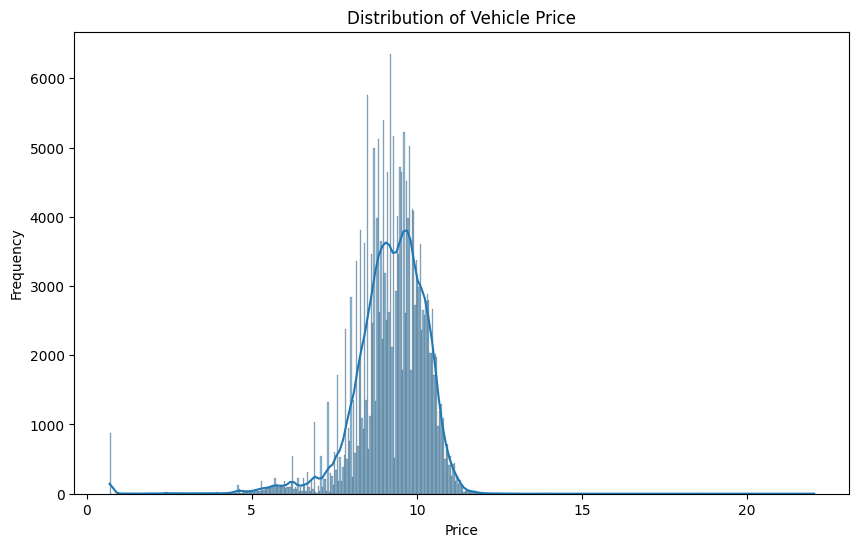

In [72]:
# visualize distribution of target variable #
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_final_df['price'], kde=True)
plt.title('Distribution of Vehicle Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

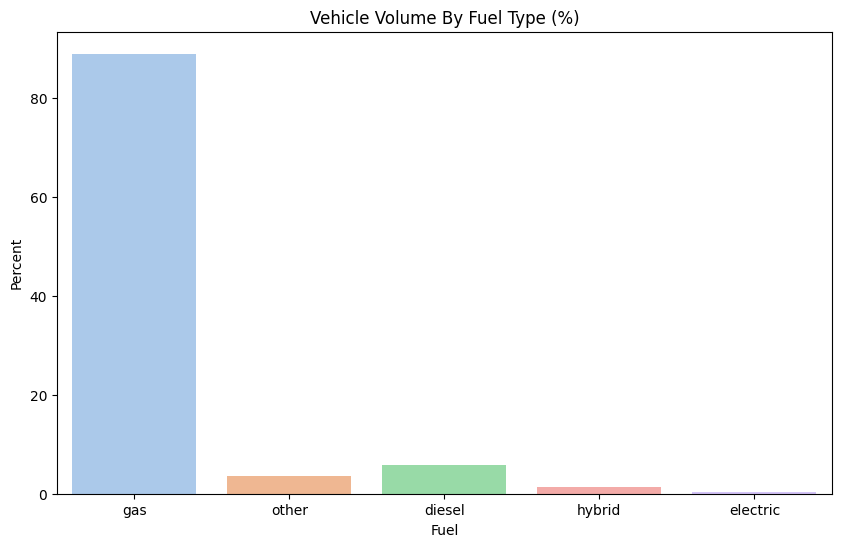

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(vehicles_final_df, x ='fuel', stat="percent",palette='pastel')
plt.title('Vehicle Volume By Fuel Type (%)')
plt.xlabel('Fuel')
plt.ylabel('Percent')
plt.show()

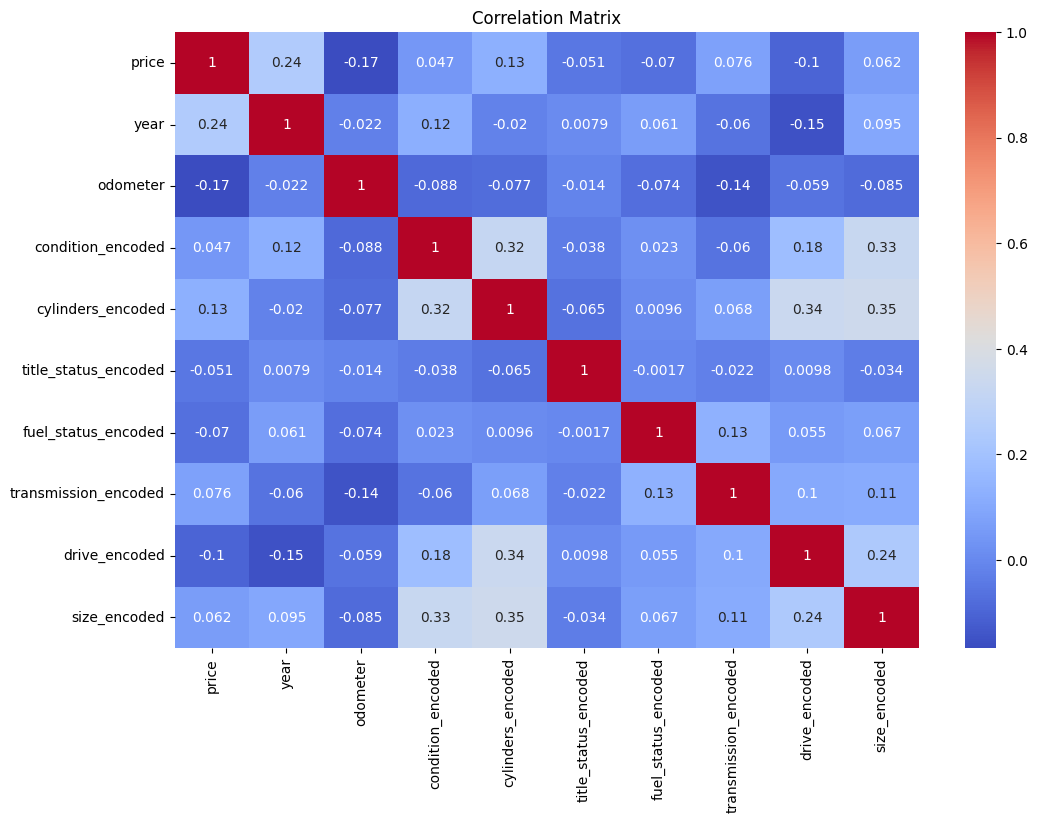

In [74]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(vehicles_final_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

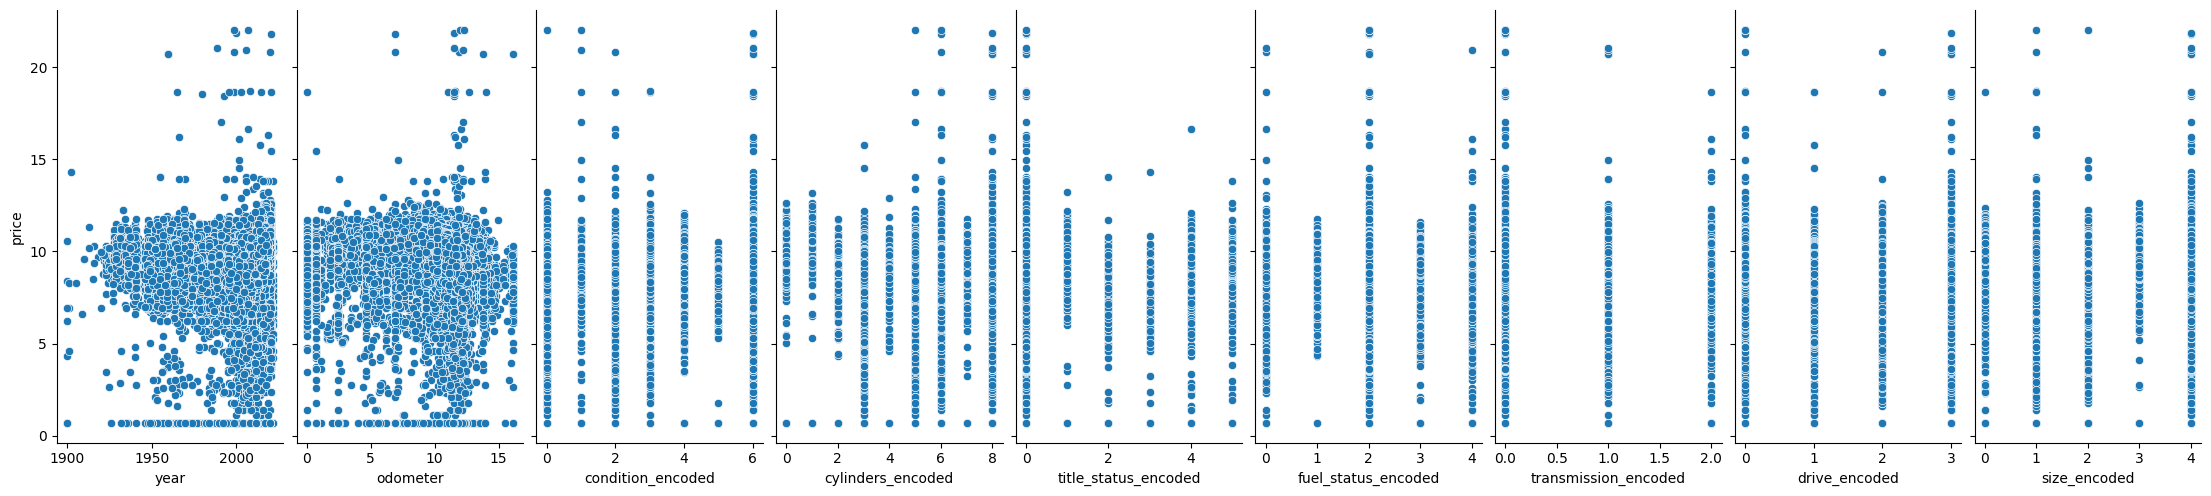

In [75]:
# Visualize relationships between features and target
feature_names = ['year','odometer','condition_encoded', 'cylinders_encoded','title_status_encoded','fuel_status_encoded','transmission_encoded','drive_encoded','size_encoded']
sns.pairplot(vehicles_final_df, x_vars=feature_names, y_vars='price', height=5, aspect=0.5)
plt.show()

### Split Data

In [76]:
#split the data (80:20 ratio) into training & test sets #
feature_names = ['year','odometer','condition_encoded', 'cylinders_encoded','title_status_encoded','fuel_status_encoded','transmission_encoded','drive_encoded','size_encoded']
X = vehicles_final_df[feature_names]
y = vehicles_final_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


# Modeling

### Linear Regression Model

### Linear Regression Model with Polynomial Degree

In [77]:
# determine best complexity #
model1_train_mses = []
model1_test_mses = []

for i in range(1, 5):
    pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias=False)), ('linreg', LinearRegression())])
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    model1_train_mses.append(mean_squared_error(y_train, train_preds))
    model1_test_mses.append(mean_squared_error(y_test, test_preds))

best_model_complexity = model1_test_mses.index(min(model1_test_mses)) + 1
print(f'Linear Regression (Best Polynomial Degree ) : = {best_model_complexity} ')

Linear Regression (Best Polynomial Degree ) : = 3 


In [78]:
# linear regression model using degree 3 #
lr_poly_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias=False)), ('linreg', LinearRegression())])
lr_poly_pipe.fit(X_train, y_train)
test_preds = lr_poly_pipe.predict(X_test)
lr_poly_pipe_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
lr_poly_pipe_r2 = r2_score(y_test, test_preds)
print(f'Linear Regression (Polynomial Degree Complexity 3) : RMSE = {lr_poly_pipe_rmse:.4f}, R2 = {lr_poly_pipe_r2:.4f} ')
print(f'intercept : {lr_poly_pipe.named_steps["linreg"].intercept_}')
feature_names = lr_poly_pipe.named_steps['polyfeatures'].get_feature_names_out()
coefs_df = pd.DataFrame({'feature':feature_names,'coef':lr_poly_pipe.named_steps["linreg"].coef_})
print(coefs_df.loc[coefs_df['coef'] != 0])

Linear Regression (Polynomial Degree Complexity 3) : RMSE = 0.9509, R2 = 0.3415 
intercept : -134205.13155927928
                                 feature        coef
0                                   year  204.389881
1                               odometer  145.180712
2                      condition_encoded   16.428577
3                      cylinders_encoded   58.734719
4                   title_status_encoded  267.521944
..                                   ...         ...
214  transmission_encoded size_encoded^2    0.003009
215                      drive_encoded^3   -0.228864
216         drive_encoded^2 size_encoded   -0.003416
217         drive_encoded size_encoded^2    0.000558
218                       size_encoded^3    0.002275

[219 rows x 2 columns]


### Linear Regression Model with Feature Selection using GridSearchCV

In [79]:
# linear regression model using feature selection #
param_dict = {'selector__n_features_to_select':np.linspace(1, 10,10)}
lr_selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),('model', LinearRegression())])
lr_selector_grid = GridSearchCV(estimator=lr_selector_pipe,param_grid=param_dict)
lr_selector_grid.fit(X_train,y_train)
test_preds = lr_selector_grid.predict(X_test)
lr_selector_test_rmse = np.sqrt(mean_squared_error(y_test,test_preds))
lr_selector_pipe_r2 = r2_score(y_test, test_preds)
print(f'Linear Regression with  with SequentialFeatureSelector using GridSearchCV : RMSE = {lr_selector_test_rmse:.4f}, R2 = {lr_selector_pipe_r2:.4f} ')

Linear Regression with  with SequentialFeatureSelector using GridSearchCV : RMSE = 1.0919, R2 = 0.1317 


### Lasso Model with Feature Selection

In [80]:
# linear regression model with 4 features #
lasso_pipe = Pipeline([('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=4)),('lasso',Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
lasso_selector1 = lasso_pipe.named_steps['column_selector']

test_preds = lasso_pipe.predict(X_test)
lasso_pipe_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
lasso_pipe_r2 = r2_score(y_test, test_preds)
print("Features:", lasso_selector1.get_feature_names_out())
print(f'Lasso model with SequentialFeatureSelector (4 Features) :  RMSE = {lasso_pipe_rmse:.4f}, R2 = {lasso_pipe_r2:.4f} ')

Features: ['year' 'odometer' 'condition_encoded' 'cylinders_encoded']
Lasso model with SequentialFeatureSelector (4 Features) :  RMSE = 1.1397, R2 = 0.0540 


### Ridge Model

In [81]:
# Determine best alpha using GridSearchCV #
ridge_param_dict =  {'alpha': np.logspace(0, 10, 50)}
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge,param_grid=ridge_param_dict)
ridge_grid.fit(X_train,y_train)
test_preds = ridge_grid.predict(X_test)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,test_preds))
ridge_pipe_r2 = r2_score(y_test, test_preds)
best_alpha = ridge_grid.best_params_['alpha']
print(f'Ridge Model (Best Alpha = {best_alpha}) using GridSearchCV : RMSE = {ridge_test_rmse:.4f}, R2 = {ridge_pipe_r2:.4f} ')


Ridge Model (Best Alpha = 68.66488450043002) using GridSearchCV : RMSE = 1.0919, R2 = 0.1317 


In [82]:
# Ridge model using best alpha #
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
test_preds = ridge.predict(X_test)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,test_preds))
ridge_pipe_r2 = r2_score(y_test, test_preds)
print(f'Ridge Model (Best Alpha = {best_alpha}) using GridSearchCV : RMSE = {ridge_test_rmse:.4f}, R2 = {ridge_pipe_r2:.4f} ')

Ridge Model (Best Alpha = 68.66488450043002) using GridSearchCV : RMSE = 1.0919, R2 = 0.1317 


<B>Modeling Verdict</B> : We have build following models and evaulate their R2 Score and RMSE(Root Mean Squared Error)


*  Linear Regression model with Degree complexity level 3 : RMSE = 0.9509, R2 = 0.3415

*  Linear Regression model with with 4 features selection : RMSE = 1.0919, R2 = 0.1317
*   Lasso model with 4 features selection :  RMSE = 1.1397, R2 = 0.0540

*   Ridge model with best alpha 68.66 : RMSE = 1.0919, R2 = 0.1317


Though, Linear Regression model with Degree complexity level 3 performs best among all models (lower RMSE and higher R2 Score), but it is overfitting due to degree  complexity 3. Therefore, best model is <b>Ridge model with best alpha 68.66 : RMSE = 1.0919, R2 = 0.1317</b>



# Evaluation


In [83]:
# ridge model : actual vs predicted #
y_pred = ridge.predict(X_test)
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
145328,10.328853,9.024232
81529,8.517393,8.844405
325200,8.853094,8.737008
372112,9.600895,9.228628
228893,10.691968,9.586212


<B>Ridge Model indicators</B>

In [95]:
# predict train and test #
ridge_train_preds = ridge.predict(X_train)
ridge_test_preds = ridge.predict(X_test)

# calculate MSE/RMSE/R2 #
ridge_train_mse = mean_squared_error(y_train,ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test,ridge_test_preds)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train,ridge_train_preds))
ridge_train_r2 = r2_score(y_train, ridge_train_preds)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,ridge_test_preds))
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

print(f'Ridge Model (Best Alpha = {best_alpha})')
print(f'RMSE = {ridge_test_rmse:.4f}, R2 = {ridge_pipe_r2:.4f} ')
print(f'Train MSE: {ridge_train_mse:.4f}, RMSE = {ridge_train_rmse:.4f}, R2 = {ridge_train_r2:.4f} ')
print(f'Test MSE: {ridge_test_mse:.4f}, RMSE = {ridge_test_rmse:.4f}, R2 = {ridge_test_r2:.4f} ')

Ridge Model (Best Alpha = 68.66488450043002)
RMSE = 1.0919, R2 = 0.1317 
Train MSE: 1.1967, RMSE = 1.0939, R2 = 0.1331 
Test MSE: 1.1922, RMSE = 1.0919, R2 = 0.1317 


<B>Interpret the Coefficients and Y-Intercept</b>

*   Coefficient Value: The value of each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.
*   Intercept: The intercept represents the expected value of the target variable when all features are zero.

*  year, fuel_status,size features have postive coefficients which means, unit increase in these features result in increase of target variance as per  features coefficient value.
*  Other features have negative coefficients which means, unit increase in these features result in decrease of target variance as per features coefficient value.
year: 0.025344
*  Intercept: -40.41. When all features are zero, the expected value of the target variable (disease progression) is -40.41 units








In [84]:
# ridge model : coefficients and the intercept  #
coefficients = pd.Series(ridge.coef_,index=['year','odometer','condition', 'cylinders','title_status','fuel_status','transmission','drive','size'])
intercept = ridge.intercept_

print(f"\nIntercept:{intercept:.4f}")
print("Ridge Regression Coefficients:")
print(coefficients)


Intercept:-40.4116
Ridge Regression Coefficients:
year            0.025344
odometer       -0.118187
condition      -0.009111
cylinders       0.098438
title_status   -0.058344
fuel_status    -0.192895
transmission    0.197872
drive          -0.129240
size            0.003189
dtype: float64


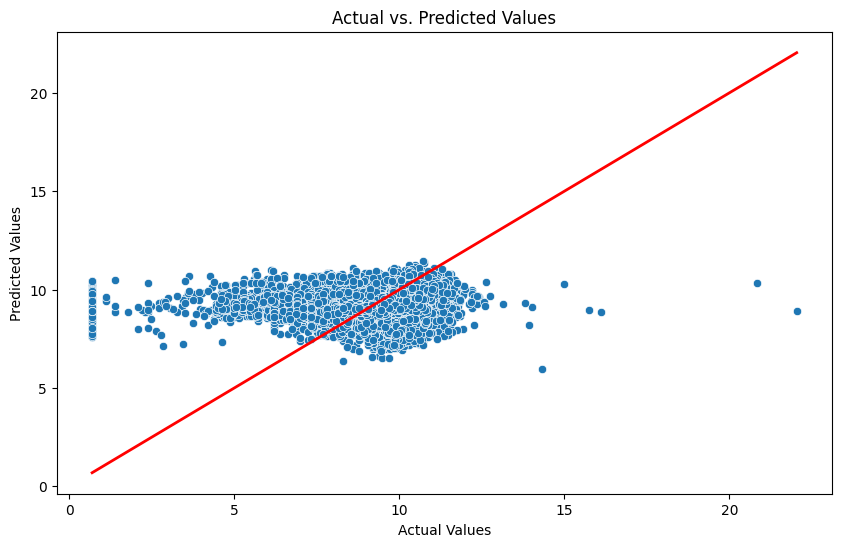

In [85]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

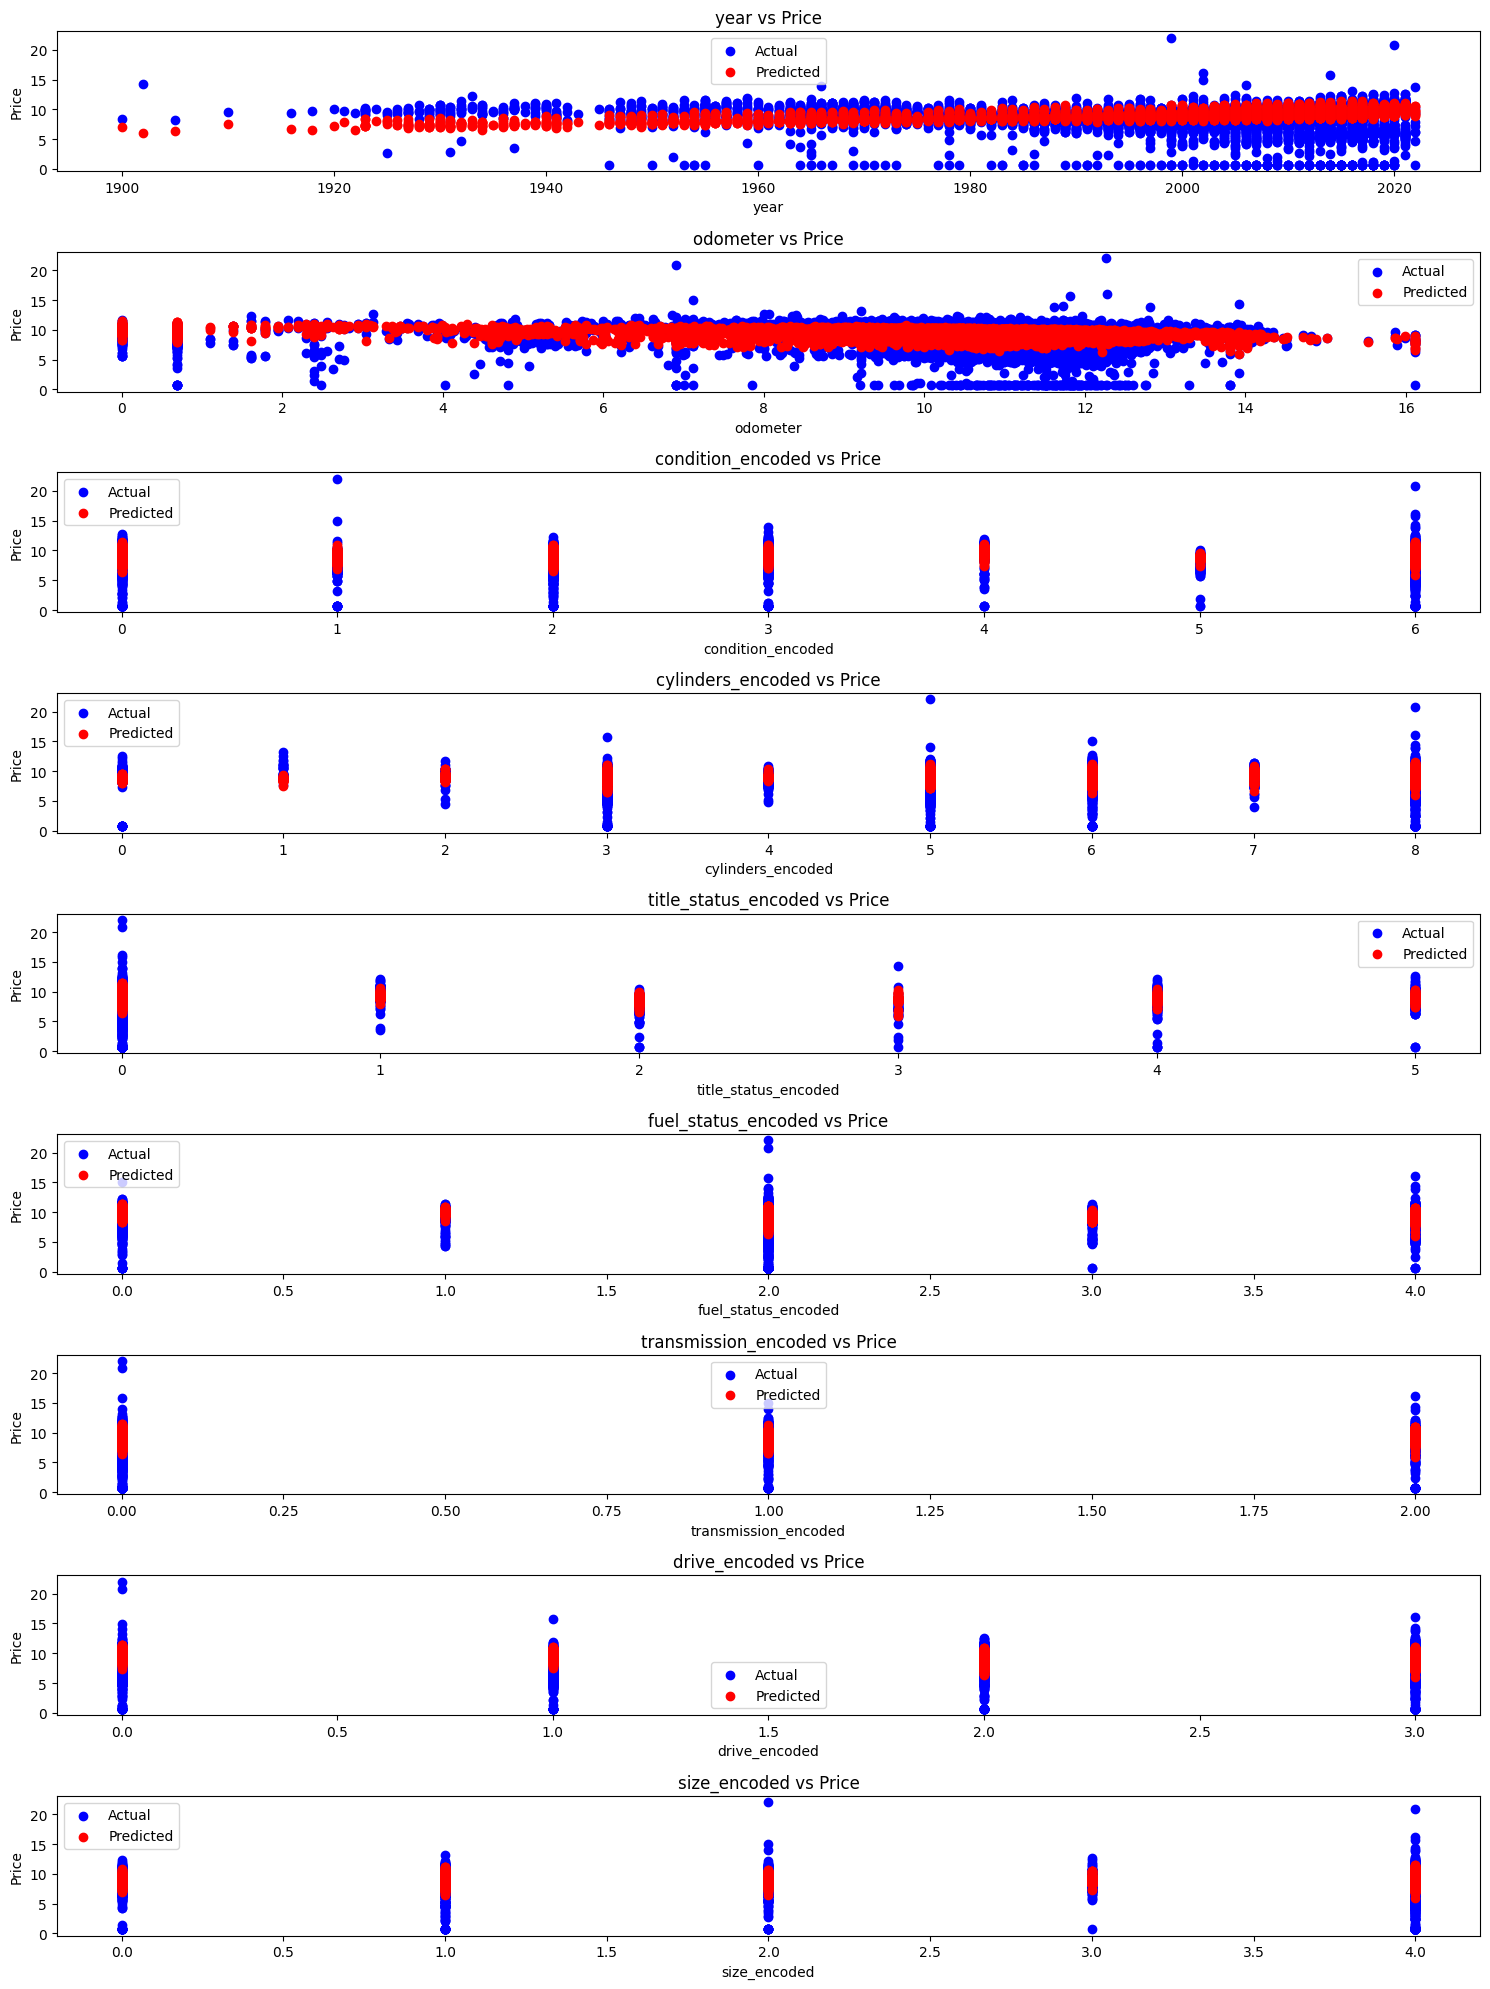

In [96]:
import matplotlib.pyplot as plt

#  ridge model features #
selected_features = ['year','odometer','condition_encoded', 'cylinders_encoded','title_status_encoded','fuel_status_encoded','transmission_encoded','drive_encoded','size_encoded']
# Create scatter plots for each selected feature against the target variable
plt.figure(figsize=(15, 20))
for i, feature in enumerate(selected_features, 1):
  plt.subplot(len(selected_features), 1, i)
  plt.scatter(X_test[feature], y_test, color='blue', label='Actual')
  plt.scatter(X_test[feature], y_pred, color='red', label='Predicted')
  plt.xlabel(f'{feature}')
  plt.ylabel('Price')
  plt.title(f'{feature} vs Price')
  plt.legend()

plt.tight_layout()
plt.show()

### Deployment

1. Save the trained model to a file for future use.
2. Load the saved model and use it to make predictions on new data.


# Conclusion

*  Year & Transmission features have strong postive impact on price of a vehicle.
*  Fuel feature has strong negative impact on vehicle price.
*  Maximum available vehicles belong to Gas fuel type category.
*  Odometer has negative impact on vehicle price means vehicle price decreases with odometer value incrases
*   There exist vehicles with value 0 and duplicate samples which are outliers for dataset










